# Part A - Q1 - Import and analyse the data set.

In [1]:
import pandas as pd
import numpy as np
#    Hint: - Use `imdb.load_data()` method
#          - Get train and test set
#          - Take 10000 most frequent words

from tensorflow.keras.datasets import imdb
(Xtrain, ytrain), (Xtest, ytest) = imdb.load_data(num_words=10000)

2023-04-01 17:33:28.922635: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
Xtrain.shape

(25000,)

In [3]:
Xtrain_longest_review = max(len(x) for x in Xtrain)
print("Xtrain Longest review is of length : {}".format(Xtrain_longest_review))

Xtest_longest_review = max(len(x) for x in Xtest)
print("Xtest Longest review is of length  : {}".format(Xtest_longest_review))

Xtrain Longest review is of length : 2494
Xtest Longest review is of length  : 2315


In [4]:
ytrain

array([1, 0, 0, ..., 0, 1, 0])

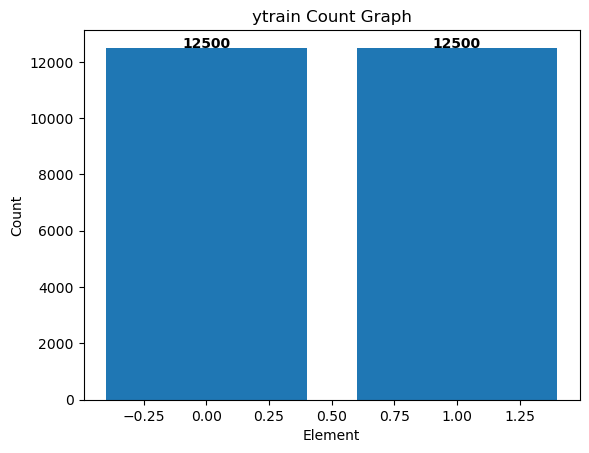

In [5]:
import matplotlib.pyplot as plt
from collections import Counter

counts = Counter(ytrain)

# extract x and y values for the graph
x = list(counts.keys())
y = list(counts.values())

# plot the graph
plt.bar(x, y)
plt.xlabel('Element')
plt.ylabel('Count')
plt.title('ytrain Count Graph')
for i, v in enumerate(y):
    plt.text(i, v+0.5, str(v), ha='center', fontweight='bold')
plt.show()

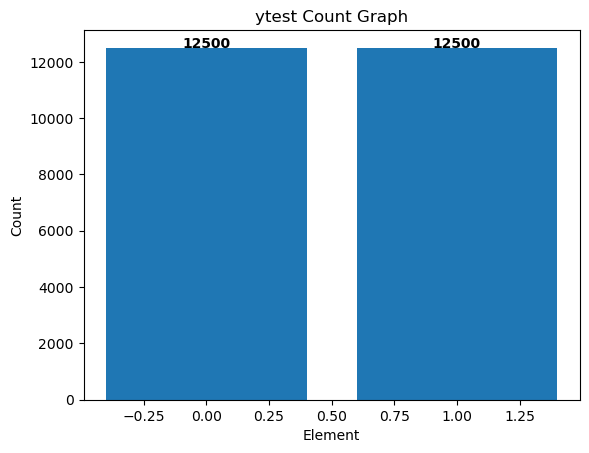

In [6]:
counts = Counter(ytest)

# extract x and y values for the graph
x = list(counts.keys())
y = list(counts.values())

# plot the graph
plt.bar(x, y)
plt.xlabel('Element')
plt.ylabel('Count')
plt.title('ytest Count Graph')
for i, v in enumerate(y):
    plt.text(i, v+0.5, str(v), ha='center', fontweight='bold')
plt.show()

In [7]:
# Reviews data is balanced

# Part A - Q2 - Perform relevant sequence adding on the data.

In [8]:
# Equalize length of each sentence
from tensorflow.keras.preprocessing.sequence import pad_sequences
Xtrain=pad_sequences(Xtrain, maxlen=300)
Xtest=pad_sequences(Xtest, maxlen=300)

# Part A - Q3 - Perform following data analysis: 
    # i) Print shape of features and labels 
    # ii) Print value of any one feature and it's label

In [9]:
Xtrain.shape

(25000, 300)

In [10]:
Xtest.shape

(25000, 300)

In [11]:
#No. of Labels
print("Train Labels: {}".format(np.unique(ytrain)))

Train Labels: [0 1]


In [12]:
print("Test Labels: {}".format(np.unique(ytest)))

Test Labels: [0 1]


In [13]:
#Print value of any one feature and it's label
Xtrain[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    1,  194, 1153,  194, 8255,   78,  228,    5,    6, 1463,
       4369, 5012,  134,   26,    4,  715,    8,  118, 1634,   14,  394,
         20,   13,  119,  954,  189,  102,    5,  207,  110, 3103,   21,
         14,   69,  188,    8,   30,   23,    7,   

In [14]:
#Label
ytrain[1]

0

# Part A - Q4 - Decode the feature value to get original sentence

In [15]:
#Dictionary mapping
word_dict = imdb.get_word_index()

In [16]:
#Decode original words 
print("The decoded Sequence of words is:")
print("=================================")
for encd in Xtrain[1]:
    for key, value in word_dict.items():
        if encd == value:
            print(key, end = " ")

The decoded Sequence of words is:
the thought solid thought senator do making to is spot nomination assumed while he of jack in where picked as getting on was did hands fact characters to always life thrillers not as me can't in at are br of sure your way of little it strongly random to view of love it so principles of guy it used producer of where it of here icon film of outside to don't all unique some like of direction it if out her imagination below keep of queen he diverse to makes this stretch and of solid it thought begins br senator and budget worthwhile though ok and awaiting for ever better were and diverse for budget look kicked any to of making it out and follows for effects show to show cast this family us scenes more it severe making senator to and finds tv tend to of emerged these thing wants but and an beckinsale cult as it is video do you david see scenery it in few those are of ship for with of wild to one is very work dark they don't do dvd with those them 

In [17]:
#Sentiment 0 = Negative 1 = positive 
ytrain[1]

0

# Part A - Q5 - Design, train, tune and test a sequential mdl.

In [18]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Embedding, LSTM, Flatten, Dense, TimeDistributed
mdl = Sequential()
mdl.add(Embedding(input_dim=10000, output_dim=100, input_length=300))
mdl.add(LSTM(64, activation = 'relu', return_sequences=True))
mdl.add(TimeDistributed(Dense(100)))
mdl.add(Flatten())
mdl.add(Dense(1024, activation = 'relu'))
mdl.add(Dense(256, activation = 'relu'))
mdl.add(Dense(32, activation = 'relu'))
mdl.add(Dense(1, activation = 'sigmoid'))

2023-04-01 17:34:18.848000: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
mdl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
mdl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 300, 64)           42240     
                                                                 
 time_distributed (TimeDistr  (None, 300, 100)         6500      
 ibuted)                                                         
                                                                 
 flatten (Flatten)           (None, 30000)             0         
                                                                 
 dense_1 (Dense)             (None, 1024)              30721024  
                                                                 
 dense_2 (Dense)             (None, 256)               262400    
                                                        

In [21]:
mdl.fit(Xtrain, ytrain, validation_data=(Xtest,ytest), epochs=5, batch_size=128)

Epoch 1/5
196/196 [==============================] - 162s 819ms/step - loss: 0.3926 - accuracy: 0.8019 - val_loss: 0.2742 - val_accuracy: 0.8846
Epoch 2/5
196/196 [==============================] - 215s 1s/step - loss: 0.1851 - accuracy: 0.9310 - val_loss: 0.2944 - val_accuracy: 0.8772
Epoch 3/5
196/196 [==============================] - 252s 1s/step - loss: 0.0995 - accuracy: 0.9646 - val_loss: 0.3552 - val_accuracy: 0.8666
Epoch 4/5
196/196 [==============================] - 205s 1s/step - loss: 0.0392 - accuracy: 0.9864 - val_loss: 0.5333 - val_accuracy: 0.8577
Epoch 5/5
196/196 [==============================] - 213s 1s/step - loss: 0.0240 - accuracy: 0.9919 - val_loss: 0.5998 - val_accuracy: 0.8615


In [22]:
score = mdl.evaluate(Xtest, ytest)
print("Test Loss: {:.2f}".format(score[0]))
print("Test Accuracy: {:.2f}".format(score[1]))

782/782 [==============================] - 64s 82ms/step - loss: 0.5998 - accuracy: 0.8615
Test Loss: 0.60
Test Accuracy: 0.86


# Part A - Q6 - Use the designed mdl to print the prediction on any one sample.

In [23]:
pred = mdl.predict(Xtest[5].reshape((1,300)))

1/1 [==============================] - 1s 522ms/step


In [24]:
print(pred, ytest[5])

[[0.9930313]] 1


In [25]:
#model prediction positive sentiment (0.99999857) | actual sentiment {positive} 1. 
#model predicted correclty

# Part B - Q1 - Read and explore the data

In [28]:
import pandas as pd
df=pd.read_json('./Sarcasm_Headlines_Dataset.json', lines=True)

In [29]:
df

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...


In [30]:
df.is_sarcastic.value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

In [31]:
# data is balanced

# Part B - Q2 - Retain relevant columns

In [32]:
# dropping article_link 
df=df.drop(['article_link'],axis=1)
df

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...
...,...,...
28614,1,jews to celebrate rosh hashasha or something
28615,1,internal affairs investigator disappointed con...
28616,0,the most beautiful acceptance speech this week...
28617,1,mars probe destroyed by orbiting spielberg-gat...


# Part B - Q3 - Get length of each sentence

In [33]:
df['len'] = df['headline'].apply(lambda x: len(x))
df.sort_values(by='len',ascending=False)

,is_sarcastic,headline,len
7302,1,hot wheels ranked number one toy for rolling d...,926
2146,1,"maya angelou, poet, author, civil rights activ...",254
16588,1,"'12 years a slave,' 'captain phillips,' 'ameri...",238
24815,1,"elmore leonard, modern prose master, noted for...",237
23598,0,occasionally you realize someone you thought w...,228
...,...,...,...
13216,1,dip good,8
17383,1,ant born,8
11889,0,déjà vu?,8
10120,1,top cute,8


# Part B - Q4 - Define parameters

In [34]:
max_length=926
max_features=10000
embedding_size=300

# Part B - Q5 - Get indices for words

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(df['headline']))
X=tokenizer.texts_to_sequences(df['headline'])

print("Samples Size:", len(X))
print(X[0])

Samples Size: 28619
[354, 3166, 7473, 2643, 2, 660, 1118]


# Part B - Q6 - Create features and labels

In [36]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X=pad_sequences(X,maxlen=max_length)
X.shape

(28619, 926)

In [37]:
y=np.asarray(df['is_sarcastic'])
print("Unique Labels : {}".format(np.unique(y)))

Unique Labels : [0 1]


# Part B - Q7 - Get vocabulary size

In [38]:
num_words= len(tokenizer.word_index)+1
print(num_words)

30885


# Part B - Q8 - Create a weight matrix using GloVe embeddings

In [39]:
from zipfile import ZipFile
with ZipFile('./glove.6b.zip','r') as z:
    z.extractall()

In [40]:
EMBEDDING_FILE = './glove.6B.300d.txt'

embeddings={}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    embd = o.split(" ")[1:]
    embd = np.asarray(embd,dtype='float32')
    embeddings[word] = embd
    
embedding_matrix=np.zeros((num_words,300))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [41]:
len(embeddings.values())

400000

# Part B - Q9 - Define and compile a Bidirectional LSTM mdl.

In [43]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Flatten, Dense, Dropout, TimeDistributed

mdl = Sequential()
mdl.add(Embedding(num_words, embedding_size, weights=[embedding_matrix], input_length=max_length))
mdl.add(Bidirectional(LSTM(128, return_sequences=True)))
mdl.add(Flatten())
mdl.add(Dense(40, activation = 'relu'))
mdl.add(Dropout(0.5))
mdl.add(Dense(20, activation = 'relu'))
mdl.add(Dropout(0.5))
mdl.add(Dense(1, activation = 'sigmoid'))
mdl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
mdl.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 926, 300)          9265500   
                                                                 
 bidirectional (Bidirectiona  (None, 926, 256)         439296    
 l)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 237056)            0         
                                                                 
 dense_5 (Dense)             (None, 40)                9482280   
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense_6 (Dense)             (None, 20)                820       
                                                      

# Part B - Q10 - Fit the mdl and check the validation accuracy

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
history=mdl.fit(X_train, y_train, batch_size=100, epochs=3, validation_split=0.2)

Epoch 1/3
184/184 [==============================] - 735s 4s/step - loss: 0.6932 - accuracy: 0.5049 - val_loss: 0.6927 - val_accuracy: 0.5174
Epoch 2/3
184/184 [==============================] - 2550s 14s/step - loss: 0.6921 - accuracy: 0.5263 - val_loss: 0.6925 - val_accuracy: 0.5174
Epoch 3/3
 25/184 [===>..........................] - ETA: 4:09:30 - loss: 0.6923 - accuracy: 0.5220

In [ ]:
# Validation Accuracy > 86%
# Validation Loss in ~ 0.38 - 0.47 range 

In [ ]:
score = mdl.evaluate(X_test, y_test)
print("Test Loss: {:.2f}".format(score[0]))
print("Test Accuracy: {:.2f}".format(score[1]))